# Sétima Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Considere o sistema cujo modelo de tempo contínuo é dado abaixo:
$$H(s) = \frac{1000(s+50)}{s^3 + 120s^2 + 4400s + 48000}$$
Pede-se:
a) Obtenha o modelo discreto com taxa de amostragem de 200Hz usando o método ZOH.

Modelo de tempo contínuo:
 <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1000 s + 5e+04
--------------------------------
s^3 + 120 s^2 + 4400 s + 4.8e+04

Função de transferência:
 <TransferFunction>: sys[0]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.01114 z^2 + 0.001238 z - 0.007721
-----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005


Equação de diferenças:
y[k] = (-2.4644 * y[k-1] + 2.0177 * y[k-2] + -0.5488 * y[k-3]) - (0.0111 * u[k-0] + 0.0012 * u[k-1] + -0.0077 * u[k-2])


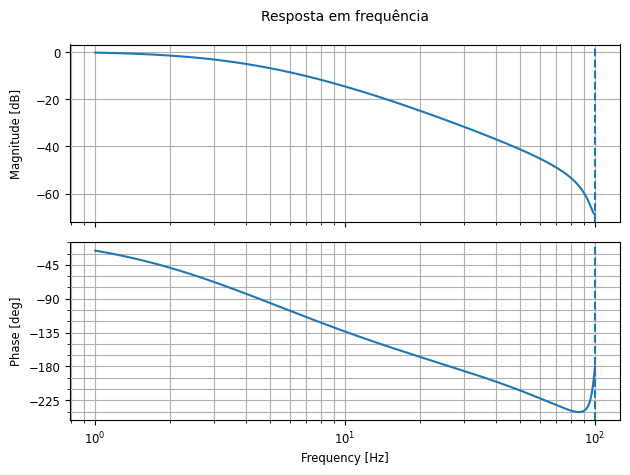

In [1]:
import control as ct
import numpy as np

sys = ct.tf((1000, 50000), (1., 120., 4400., 48000))
print(f'Modelo de tempo contínuo:\n {sys}')

Ts = 1/200
disc_sys = ct.sample_system(sys, Ts, 'zoh')
print(f'Função de transferência:\n {disc_sys}')

num_disc = disc_sys.num[0][0]
den_disc = disc_sys.den[0][0]

print("\nEquação de diferenças:")
print(f"y[k] = ({' + '.join([f'{den_disc[i]:.4f} * y[k-{i}]' for i in range(1, len(den_disc))])}) "
      f"- ({' + '.join([f'{num_disc[i]:.4f} * u[k-{i}]' for i in range(len(num_disc))])})")

ct.bode(disc_sys, dB=True, Hz=True, title='Resposta em frequência')


b) Obtenha manualmente (não usar o comando c2d) o modelo discreto com taxa de amostragem de 200Hz usando a transformação Bilinear.

0 states have been removed from the model
Função de transferência:
 <TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.005294 z^3 + 0.00647 z^2 - 0.002941 z - 0.004117
--------------------------------------------------
        z^3 - 2.462 z^2 + 2.014 z - 0.5471

dt = 0.005


Equação de diferenças:
y[k] = (-2.4621 * y[k-1] + 2.0137 * y[k-2] + -0.5471 * y[k-3]) - (0.0053 * u[k-0] + 0.0065 * u[k-1] + -0.0029 * u[k-2] + -0.0041 * u[k-3])


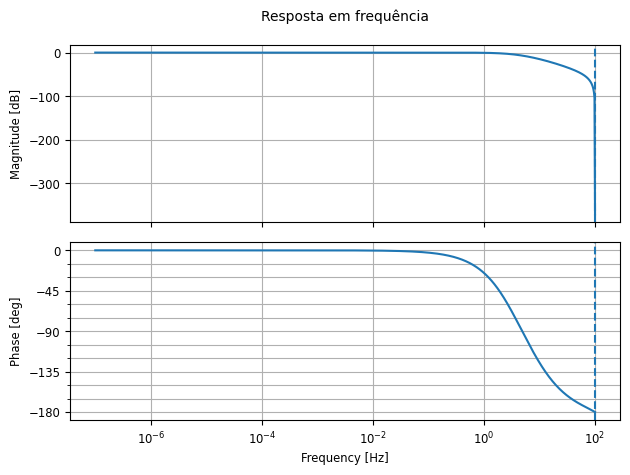

In [2]:
# ! pip install sympy
import sympy as sym

z = sym.Symbol('z')

sz = 2*(z-1)/(Ts*(z+1))

H_zbi = (1000*sz + 50000)/(sz**3 + 120*(sz**2) + 4400*sz + 48000)
H_zbi = sym.simplify(H_zbi)

z = ct.tf('z')
z.dt = Ts
H_zbio = (2250.0*z**3 + 2750.0*z**2 - 1250.0*z - 1750.0)/(425040.0*z**3 - 1046480.0*z**2 + 855920.0*z - 232560.0)
H_zbio = ct.minreal(H_zbio)
print(f'Função de transferência:\n {H_zbio}')

num_disc = H_zbio.num[0][0]
den_disc = H_zbio.den[0][0]

print("\nEquação de diferenças:")
print(f"y[k] = ({' + '.join([f'{den_disc[i]:.4f} * y[k-{i}]' for i in range(1, len(den_disc))])}) "
      f"- ({' + '.join([f'{num_disc[i]:.4f} * u[k-{i}]' for i in range(len(num_disc))])})")


ct.bode(H_zbio, dB=True, Hz=True, title='Resposta em frequência')


c) Obtenha manualmente (não usar o comando c2d) o modelo discreto com taxa de amostragem de 200Hz usando a transformação por Polos e Zeros Casados.

[-50.]
[-60. -40. -20.]
<TransferFunction>: sys[62]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      z^2 - 1.558 z + 0.6065
----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005

0.094435722154266
<TransferFunction>: sys[62]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      z^2 - 1.558 z + 0.6065
----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005


Equação de diferenças:
y[k] = (-2.4644 * y[k-1] + 2.0177 * y[k-2] + -0.5488 * y[k-3]) - (0.0944 * u[k-0] + -0.1471 * u[k-1] + 0.0573 * u[k-2])


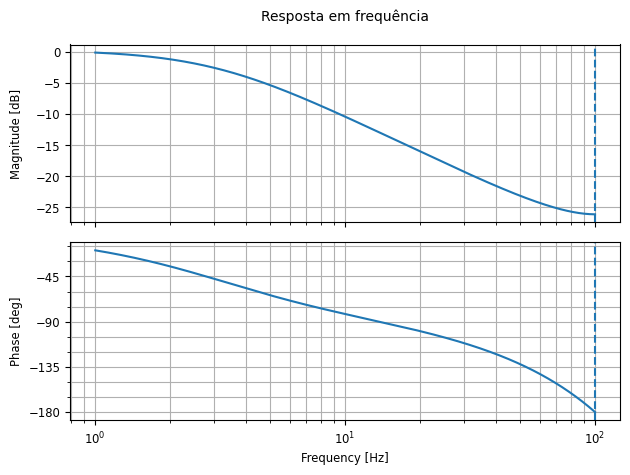

In [3]:
# ! pip install sympy
from scipy.signal import tf2zpk
import matplotlib.pyplot as plt 

z, p, k = tf2zpk([1000, 50000], [1, 120, 4400, 48000]) 
print(z)
print(p)
z = np.concatenate([z, np.full(1, z)])

s = ct.tf('s')
H_s = 1000*(s+50)/(s**3 + 120*s**2 + 4400*s + 48000)

Ts = 1/200

pz = np.exp(p*Ts)
zz = np.exp(z*Ts)
H_z = ct.tf(np.poly(zz),np.poly(pz),Ts)
print(H_z)

#Frequência escolhida com base no pico da magnitude: 1Hz
kz = abs(ct.evalfr(H_s,1j*2*np.pi*1))/abs(ct.evalfr(H_z,np.exp(1j*2*np.pi*1*Ts)))
print(kz)
H_zpz = kz*H_z
print(H_z)

num_disc = H_zpz.num[0][0]
den_disc = H_zpz.den[0][0]

print("\nEquação de diferenças:")
print(f"y[k] = ({' + '.join([f'{den_disc[i]:.4f} * y[k-{i}]' for i in range(1, len(den_disc))])}) "
      f"- ({' + '.join([f'{num_disc[i]:.4f} * u[k-{i}]' for i in range(len(num_disc))])})")


ct.bode(H_zpz, dB=True, Hz=True, title='Resposta em frequência')




O modelo que mais se aproxima em magnitude é o ZOH, já em fase, é o bilinear.


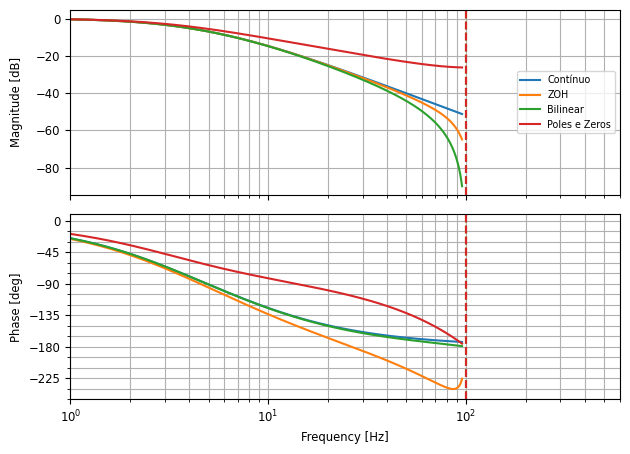

In [4]:
fig1 = plt.figure(1)
plt.clf()

ct.bode(sys,dB=True,Hz=True,omega_limits=[1,600], label='Contínuo')
ct.bode(disc_sys,dB=True,Hz=True,omega_limits=[1,600], label='ZOH')
ct.bode(H_zbio,dB=True,Hz=True,omega_limits=[1,600], label='Bilinear')
ct.bode(H_zpz,dB=True,Hz=True,omega_limits=[1,600], label='Poles e Zeros')

print("O modelo que mais se aproxima em magnitude é o ZOH, já em fase, é o bilinear.")